In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('C:/Users/Paname/Desktop/Ml//bigdataproject/datasets/2015_2022.csv')
data.shape

C:\Users\Paname\AppData\Local\Temp\ipykernel_4992\2478799477.py:1: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('C:/Users/Paname/Desktop/Ml//bigdataproject/datasets/2015_2022.csv')


(656903, 17)

In [5]:
### Add minute column
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'], format='%d/%m/%Y %H:%M')
data['minute'] = data['OCCURRED_ON_DATE'].dt.minute

In [6]:
### Add Type column
data['Type']=data['OFFENSE_DESCRIPTION'].str.split('-').str[0]

#### DEBUT DE Transforamation

In [7]:
### Add Occurred column
data['Occurred'] = 1

In [8]:
### drop missing values
data.dropna(subset=['Long', 'Lat', 'DISTRICT'], inplace=True)

In [9]:
### drop unuseless coloumns 
data=data.drop(columns=['INCIDENT_NUMBER','OFFENSE_DESCRIPTION','OFFENSE_CODE','UCR_PART','STREET','Location','OFFENSE_CODE_GROUP','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE'],axis=1)

In [ ]:
msno.matrix(data)

In [ ]:
data.head(15)

In [10]:
#### Create a DataFrame from the list of combinations

years = list(range(2015, 2023))
months = list(range(1, 13))
#days = list(range(1, 31))
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday']
hours = list(range(24))
minutes = list(range(60))

all_combinations = []

for year in years:
    for month in months:
        for day in days:
            for hour in hours:
                for minute in minutes:
                    all_combinations.append([year, month, day, hour, minute])

columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute']
df = pd.DataFrame(all_combinations, columns=columns)


In [11]:
### drop rows that have year 2015 and months(0,1,2,3,4,5,6)
for i in range(6):
    # Use boolean indexing to identify rows to drop
    rows_to_drop = (df['YEAR'] == 2015) & (df['MONTH'] == i)    
    # Drop rows based on the identified condition
    df = df[~rows_to_drop]

In [12]:
### add new column Occurred in dataframe df
df['Occurred']=0

In [13]:
### get rows that not exist in data dataframe 
missing_rows = df[~df[['YEAR', 'MONTH', 'DAY_OF_WEEK','HOUR', 'minute']].isin(data[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute']]).all(axis=1)]

In [ ]:
merged_df = pd.merge(df, data, on=['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute'], how='outer', indicator=True)
new_df1 = merged_df.loc[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

In [ ]:
new_df1=new_df1.drop(columns=['DISTRICT','Lat','Long','Type','Occurred'],axis=1)
new_df1['Occurred']=0
new_df1

In [ ]:
data = pd.concat([new_df1, data], ignore_index=True)
result=data.sort_values(by=['YEAR', 'MONTH', 'DAY_OF_WEEK','HOUR', 'minute'])
data.head(1)

In [744]:
data.isnull().sum()

DISTRICT       0
YEAR           0
MONTH          0
DAY_OF_WEEK    0
HOUR           0
Lat            0
Long           0
minute         0
Type           0
Occurred       0
dtype: int64

In [14]:
data = pd.concat([data,missing_rows[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute','Occurred']]], ignore_index=True).sort_values(by=['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute','Occurred']).reset_index()

In [17]:
### fill missing values in columns 'DISTRICT', 'Lat', 'Long', 'Type' using methode ffill
data[['DISTRICT', 'Lat', 'Long', 'Type']] = data[['DISTRICT', 'Lat', 'Long', 'Type']].fillna(method='ffill')

C:\Users\Paname\AppData\Local\Temp\ipykernel_4992\3148879491.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['DISTRICT', 'Lat', 'Long', 'Type']] = data[['DISTRICT', 'Lat', 'Long', 'Type']].fillna(method='ffill')


In [18]:
data.isnull().sum()

index          0
DISTRICT       0
YEAR           0
MONTH          0
DAY_OF_WEEK    0
HOUR           0
Lat            0
Long           0
minute         0
Type           0
Occurred       0
dtype: int64

In [ ]:
#data1 = pd.concat([data,new_df1[['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute','Occurred']]], ignore_index=True).sort_values(by=['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'minute']).reset_index()

In [19]:
#### drop duplicates values
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [20]:
count_occurred_0 = (data['Occurred'] == 0).sum()
count_occurred_1 = (data['Occurred'] == 1).sum()
print(count_occurred_0)
print(count_occurred_1)

917280
618907


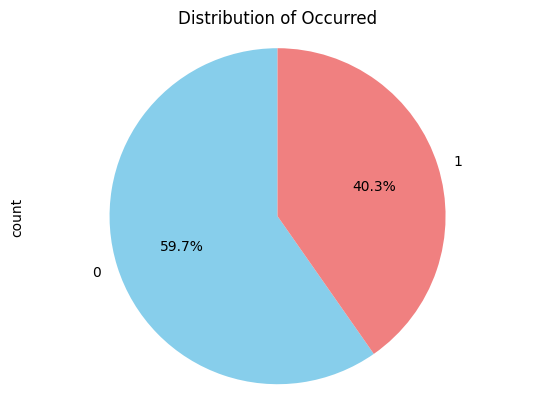

In [21]:
occurred_counts = data['Occurred'].value_counts()

# Plot a pie chart
occurred_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Occurred')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [22]:
### drop unuseless coloumns 
data=data.drop(columns=['YEAR'],axis=1)

In [23]:
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm


In [ ]:
#Import svm model


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [24]:
labelEncoder1 = LabelEncoder()
scaler = MinMaxScaler()

X1=data.drop(columns=['Occurred'],axis=1)
Y1=data['Occurred']
# undersample
rus = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X1, Y1)


X_train_resampled['Type'] = labelEncoder1.fit_transform(X_train_resampled['Type'])
X_train_resampled['DISTRICT'] = labelEncoder1.fit_transform(X_train_resampled['DISTRICT'])
X_train_resampled['DAY_OF_WEEK'] = labelEncoder1.fit_transform(X_train_resampled['DAY_OF_WEEK'])

# Reshape 'Lat' and 'Long' columns
X_train_resampled['Lat'] = scaler.fit_transform(X_train_resampled['Lat'].values.reshape(-1, 1))
X_train_resampled['Long'] = scaler.fit_transform(X_train_resampled['Long'].values.reshape(-1, 1))

#### Building Model Machine Learning

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            le = LabelEncoder()
            X_copy[col] = le.fit_transform(X_copy[col])
        return X_copy


In [26]:
from sklearn.calibration import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

labelEncoder1 = LabelEncoder()
scaler = MinMaxScaler()

categorical_features = ['Type', 'DISTRICT', 'DAY_OF_WEEK']
numerical_features = ['Lat', 'Long']

numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ('label_encoder', MultiColumnLabelEncoder(columns=categorical_features))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ], remainder='passthrough'
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
      #("classifier",XGBClassifier(objective='binary:logistic', n_estimators=200, learning_rate=0.01, subsample=1, use_label_encoder=False, eval_metric='error') )
      ("classifier",svm.SVC(kernel='linear'))
    ]  
)

X = data.drop(columns=['Occurred'], axis=1)
Y = data['Occurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Train the model using the pipeline
clf.fit(X_train,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
clf

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183631
           1       1.00      1.00      1.00    123607

    accuracy                           1.00    307238
   macro avg       1.00      1.00      1.00    307238
weighted avg       1.00      1.00      1.00    307238



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Lat', 'Long']),
                                                 ('cat',
                                                  Pipeline(steps=[('label_encoder',
                                                                   MultiColumnLabelEncoder(columns=['Type',
                                                                                                    'DISTRICT',
                                                                                                    'DAY_OF_WEEK']))]),
                                                  ['Type', 'DISTRICT',
                                                   'DAY_OF_WEEK'])])),
                ('classifier', SVC(kernel='linear'))])

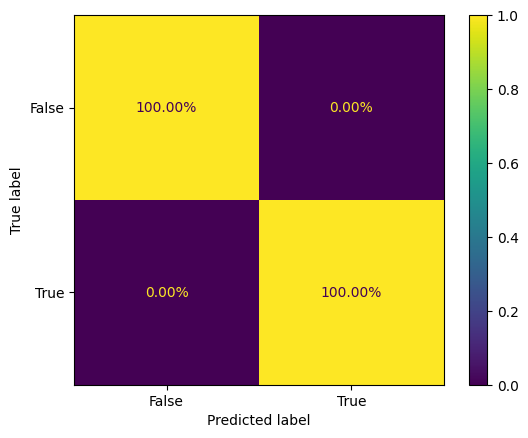

In [27]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Create ConfusionMatrixDisplay with normalized confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=normalized_confusion_matrix, display_labels=[False, True])

# Plot the confusion matrix
cm_display.plot(values_format='.2%')  # Display values as percentage with two decimal places
plt.show()


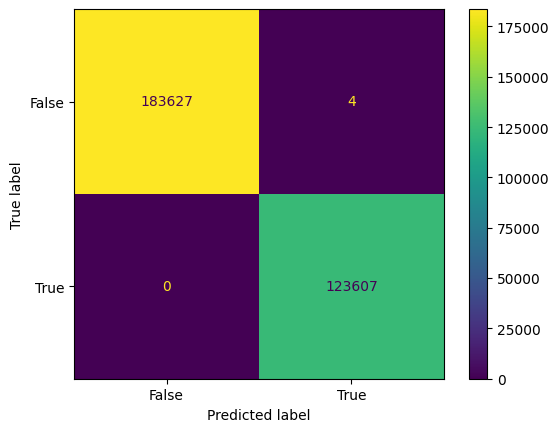

In [28]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from pickle import dump
import pickle
dump(clf, open('clf.pkl', 'wb'))


#### DATA CLENING FOR  TESTING THE MODEL 

In [29]:
data_test=pd.read_csv('C:/Users/Paname/Desktop/Ml/bigdataproject/datasets/2023_to_ Present.csv')

C:\Users\Paname\AppData\Local\Temp\ipykernel_4992\3129550728.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test=pd.read_csv('C:/Users/Paname/Desktop/Ml/bigdataproject/datasets/2023_to_ Present.csv')


In [30]:
data_test['OCCURRED_ON_DATE'] = pd.to_datetime(data_test['OCCURRED_ON_DATE'])
data_test['minute'] = data_test['OCCURRED_ON_DATE'].dt.minute


In [31]:
data_test['Type']=data_test['OFFENSE_DESCRIPTION'].str.split('-').str[0]

In [32]:
data_test['Occurred'] = 1

In [33]:
data_test.dropna(subset=['Long', 'Lat', 'DISTRICT'], inplace=True)

In [777]:
data_test.to_csv('data_test.csv')

In [34]:
data_test=data_test.drop(columns=['INCIDENT_NUMBER','YEAR','OFFENSE_DESCRIPTION','OFFENSE_CODE','UCR_PART','STREET','Location','OFFENSE_CODE_GROUP','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE'],axis=1)

In [ ]:
msno.matrix(data_test)

In [35]:
labelEncoder1 = LabelEncoder()

data_test['Type'] = labelEncoder1.fit_transform(data_test['Type'])
data_test['DISTRICT'] = labelEncoder1.fit_transform(data_test['DISTRICT'])
data_test['DAY_OF_WEEK'] = labelEncoder1.fit_transform(data_test['DAY_OF_WEEK'])

scaler = MinMaxScaler()

# Reshape 'Lat' and 'Long' columns
data_test['Lat'] = scaler.fit_transform(data_test['Lat'].values.reshape(-1, 1))
data_test['Long'] = scaler.fit_transform(data_test['Long'].values.reshape(-1, 1))

In [41]:
data_test.head(5)

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,minute,Type
1,6,1,1,9,0.998732,0.001742,0,26
2,8,1,5,23,0.998691,0.001535,50,63
3,6,1,5,23,0.998984,0.001862,59,5
4,0,1,6,0,0.999217,0.001671,0,73
5,3,1,6,0,0.997914,0.001379,0,34


In [43]:
X_test1=data_test.drop(columns=['Occurred'],axis=1).reset_index()

In [ ]:
y_pred = clf.predict(X_test)

In [44]:
y_pred1 = clf.predict(X_test1)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

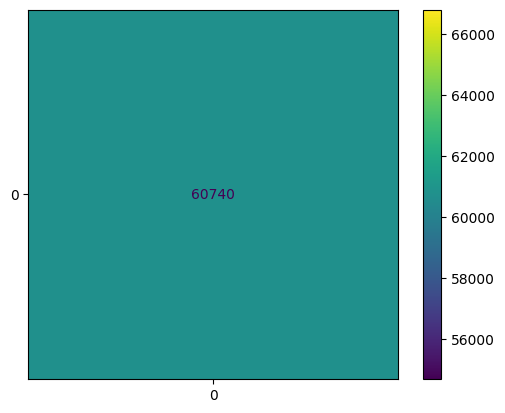

In [45]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(data_test['Occurred'], y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(data_test['Occurred'], y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     60740

    accuracy                           1.00     60740
   macro avg       1.00      1.00      1.00     60740
weighted avg       1.00      1.00      1.00     60740

